In [2]:
import numpy as np
from matplotlib.pyplot import subplots

In [53]:
def S_euler(S0, sigma, r, T):
    N = 1000 # num paths
    M = 1000 # num times path changes
    dt = T/M
    paths = []

    for i in range(N): # iterating for each path
        S = np.zeros(M+1) # stock path for one of them
        S[0] = S0 # intial stock price is S0

        for n in range(M):
            epsilon = np.random.normal(loc = 0, scale = 1) # sample change from norm dist
            S[n+1] = S[n] + r * S[n] * dt + sigma * S[n] * np.sqrt(dt) * epsilon # plugging each into euler formula

        paths.append(S) # adding the path to the bank
        
    return paths

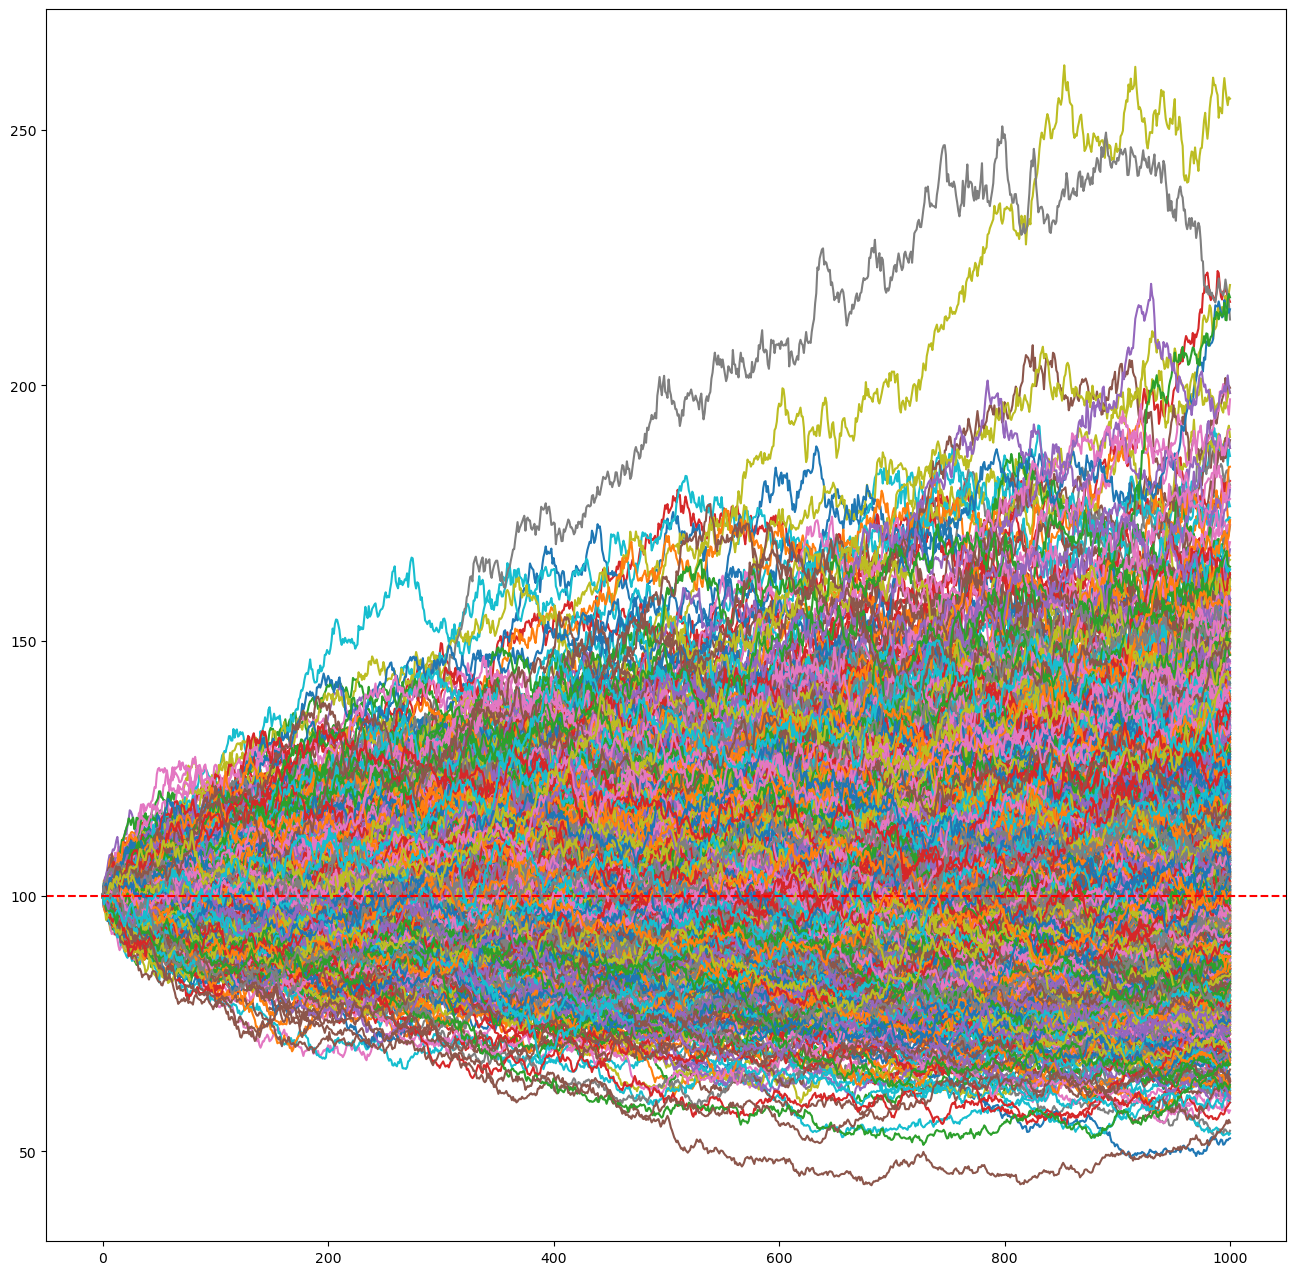

In [70]:
paths = S_euler(100, 0.25, 0.07, 1)
fig, ax = subplots(figsize = (16, 16))
for path in paths:
    ax.plot(path)
ax.axhline(100, c = 'r', ls = '--');

In [57]:
def asia_put(S0, sigma, r, T):
    paths = S_euler(S0, sigma, r, T)
    payoffs = []

    for path in paths:
        payoff = max(np.mean(path) - path[-1], 0) # we calculating the mean and subtracting it from final stock price
        payoffs.append(payoff)

    price = np.mean(payoffs) * np.e ** (-r * T) # calculating price using the expected value
    return price

In [72]:
asia_put(100, 0.25, 0.07, 1)

4.190046833033553